### Dataset & Libraries 

In [1]:
import pandas as pd
import pickle


train_df = pd.read_json("train.json")
test_df = pd.read_json("test.json")
train_label = pd.read_csv("train_label.csv")


In [2]:
train_df

,Id,description,gender
0,0,She is also a Ronald D. Asmus Policy Entrepre...,F
1,1,He is a member of the AICPA and WICPA. Brent ...,M
10,8,Her teachings get straight to the heart of Ta...,F
100,80,"She founded Couples Therapy Inc, where she pr...",F
1000,780,He is the head of the Christian Doppler Labor...,M
10000,8015,She has worked in the field of disaster manag...,F
100000,80026,"She is a columnist for Russian Forbes, a free...",F
100003,80027,His patients gave him an average rating of 2....,M
100004,80028,Dr. Grunewald's areas of expertise consist of...,M
100005,80029,These areas are among Dr. Ennis's clinical in...,M


In [3]:
train_label

,Id,Category
0,0,19
1,1,9
2,2,19
3,3,24
4,4,24
5,5,22
6,6,6
7,7,6
8,8,3
9,9,14


In [4]:
categories_df= pd.read_csv("categories_string.csv")

In [5]:
categories_df
#on a 27 métiers 

,0,1
0,pastor,0
1,model,1
2,yoga_teacher,2
3,teacher,3
4,personal_trainer,4
5,painter,5
6,journalist,6
7,interior_designer,7
8,surgeon,8
9,accountant,9


In [6]:
print(len(test_df))

54300


In [7]:
#L'idée c'est d'entrainer sur > 210 000 train dataset, 
#et sur les 54 300 du test on remplit les submissions csv avec notre prédiction sur quel metier (1 à 27)

### Cleaning 

#### Librairies 


In [8]:
import re 
from wordcloud import WordCloud
from nltk.corpus import stopwords


• lower the data  


In [9]:
lower= lambda new : new.lower() 

In [10]:
train_df['description']=train_df['description'].apply(lower)

In [11]:
train_df

,Id,description,gender
0,0,she is also a ronald d. asmus policy entrepre...,F
1,1,he is a member of the aicpa and wicpa. brent ...,M
10,8,her teachings get straight to the heart of ta...,F
100,80,"she founded couples therapy inc, where she pr...",F
1000,780,he is the head of the christian doppler labor...,M
10000,8015,she has worked in the field of disaster manag...,F
100000,80026,"she is a columnist for russian forbes, a free...",F
100003,80027,his patients gave him an average rating of 2....,M
100004,80028,dr. grunewald's areas of expertise consist of...,M
100005,80029,these areas are among dr. ennis's clinical in...,M



• remove stopwords   


In [37]:

stop_words = stopwords.words('english')

In [38]:
stop_words #nltk stop-words stop-words list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
remove_stop_words = lambda new : [i for i in new.split() if i not in stop_words]

In [15]:
train_df['description']=train_df['description'].apply(remove_stop_words)

In [16]:
train_df

,Id,description,gender
0,0,"[also, ronald, d., asmus, policy, entrepreneur...",F
1,1,"[member, aicpa, wicpa., brent, graduated, univ...",M
10,8,"[teachings, get, straight, heart, tantric, bud...",F
100,80,"[founded, couples, therapy, inc,, practices, i...",F
1000,780,"[head, christian, doppler, laboratory, monitor...",M
10000,8015,"[worked, field, disaster, management, 20, year...",F
100000,80026,"[columnist, russian, forbes,, freelance, write...",F
100003,80027,"[patients, gave, average, rating, 2.5, 5, star...",M
100004,80028,"[dr., grunewald's, areas, expertise, consist, ...",M
100005,80029,"[areas, among, dr., ennis's, clinical, interes...",M


ici, nous avons pour chaque description de job non plus un paragraphe mais une liste de mots (tous en lowercase pour ne pas considérer par She and she as the same mot, et dont les mots 'bruits' st she are is etc. ont été supprimés)
Nous pouvons faire un Wordcloud pour voir les mots les plus fréquents et ainsi à la main ajouter des mots à la liste par défaut de stop-words si nous avons des mots 'bruits' particuliers à notre dataset

• Wordcloud

In [17]:
#créer une phrase de mots qui contient les mots du bag of word (= une liste des mots de tous le dataset)
bow=(train_df['description'].tolist())
flatten = lambda t: [item for sublist in t for item in sublist]
bow= flatten(bow)
sentence= ' '.join(word for word in bow)


In [18]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate(sentence)

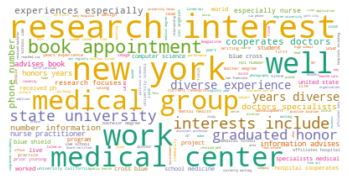

In [20]:
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Le dataset a l'air plutôt propre  
• qlq propostitions : enlever 'new york/ united states/ well/ diverse/experience' qui n'ajoutent rien à la spécification d'un métier? 

In [39]:
new_stop_words = ['well', 'diverse', 'experience']
stop_words= stop_words.append(new_stop_words)
#piste à poursuivre ou pas .. (ou à faire après l'étape de stemming)

• Stemming = remettre un mot à sa racine   
• PorterStemmer

In [30]:
from nltk.stem import PorterStemmer
# some words to be stemmed 
words = ["program", "experiences","fairly", "including", "be", "being", "was", "is","especially", "special","include", "universities"] 
ps = PorterStemmer()  
for w in words: 
    print(w, " : ", ps.stem(w)) 

program  :  program
experiences  :  experi
fairly  :  fairli
including  :  includ
be  :  be
being  :  be
was  :  wa
is  :  is
especially  :  especi
special  :  special
include  :  includ
universities  :  univers


Pour moi ce n'est pas la bonne solution  
be : was-> wa et is -> is (c'est quand même l'exemple le plus simple)  
university-> univers (pas du tout le même sens)

• LancasterStemmer   
"LancasterStemmer is simple, but heavy stemming due to iterations and over-stemming may occur. Over-stemming causes the stems to be not linguistic, or they may have no meaning"

In [31]:
from nltk.stem import LancasterStemmer
# some words to be stemmed 
words = ["program", "experiences","fairly", "including", "be", "being", "was", "is","especially", "special","include", "universities"] 
lc = LancasterStemmer()  
for w in words: 
    print(w, " : ", lc.stem(w)) 


program  :  program
experiences  :  expery
fairly  :  fair
including  :  includ
be  :  be
being  :  being
was  :  was
is  :  is
especially  :  espec
special  :  spec
include  :  includ
universities  :  univers


qlq différences entre les deux je ne sais pas lequel choisir ou si y a mieux (à creuser)

In [33]:
# fonction pour stem les mots du data à adapter en fonction du stemmer choisi

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
ps = PorterStemmer()
lc = LancasterStemmer()
stem_words = lambda new: [ps.stem(word) for word in new]
train_df['description']=train_df['description'].apply(stem_words)


In [34]:
train_df

,Id,description,gender
0,0,"[also, ronald, d., asmu, polici, entrepreneur,...",F
1,1,"[member, aicpa, wicpa., brent, graduat, univer...",M
10,8,"[teach, get, straight, heart, tantric, buddhis...",F
100,80,"[found, coupl, therapi, inc,, practic, intern,...",F
1000,780,"[head, christian, doppler, laboratori, monitor...",M
10000,8015,"[work, field, disast, manag, 20, years,, signi...",F
100000,80026,"[columnist, russian, forbes,, freelanc, writer...",F
100003,80027,"[patient, gave, averag, rate, 2.5, 5, stars., ...",M
100004,80028,"[dr., grunewald', area, expertis, consist, lun...",M
100005,80029,"[area, among, dr., ennis', clinic, interests:,...",M


In [40]:
#snowball algorithm à checker #pip install pystremmer sur le terminal 

### Preparer le training dataset

• On doit rpz les données numériquement -> différentes méthodes de embedding  
• Word2vec